<font size = 1 color="gray">Introducción a la computación numérica y simbólica con Python</font>  
<img src="img/logo-vector-u-tad.jpg" align="left" >

# 4. Integración numérica

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Integración por a regla del trapecio

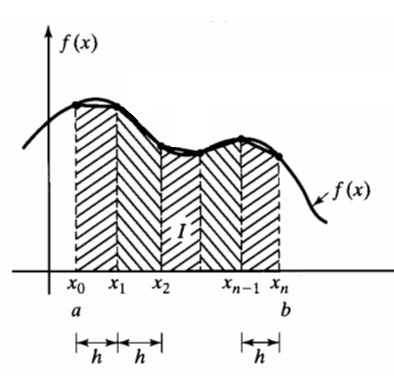

Sea $f(x)$ continua y positiva en el intervalo $[a,b]$. La integral definida $\int _{a}^{b}f(x)\,dx$ representa el área de la región delimitada por la gráfica de $f$ y el eje $x$, desde $x=a$ hasta $x=b$. 

El método del trapecio se basa en aproximar la curva $f(x)$ mediante una recta en cada tramo $x_{i-1},x_{i}$ y calcular el área de este figura. Dividimos el intervalo $[a,b]$ en n trapecios, cada uno con base $\Delta x=(b-a)/n$. La integral se aproxima a la suma de áreas de los trapecios:

$ \int _{a}^{b}f(x)\,dx\sim {\frac {h}{2}}[f(a)+2f(a+h)+2f(a+2h)+...+f(b)]$
Donde $\textstyle h={\frac {b-a}{n}}$ y n es el número de tramos.

Simplificando:

$ \int _{a}^{b}f(x)dx = \frac{\Delta x}{2} \sum_{i=1}^n (f(x_i) + f(x_{i-1})) = \frac{1}{2} \left( \sum_{i=1}^n f(x_i) \Delta x + \sum_{i=1}^n f(x_{i-1}) \Delta x \right)$

In [2]:
def funx2(x):
    return (x*2)

def integraltrapz(f,a,b,n=50):
    xf = np.linspace(a,b,n+1) # N+1 points make N subintervals
    y = f(xf)
    y_right = y[1:] # puntos de la derecha de los trapecios
    y_left = y[:-1] # puntos de la izquierda de los trapecios
    dx = (b - a)/n
    area = (dx/2) * np.sum(y_right + y_left)
    return area

integxsqmytrapez = integraltrapz(lambda x : x**2,0,1)   # definimos la función a integrar en la llamada usando lambda
print("Integral de x^2 entre 0 y 1 según la regla del trapecio es {:.8f} ".format(integxsqmytrapez),"con un error absoluto ",abs((1/3)-integxsqmytrapez))


Integral de x^2 entre 0 y 1 según la regla del trapecio es 0.33340000  con un error absoluto  6.666666666671484e-05


## Integración por el punto medio

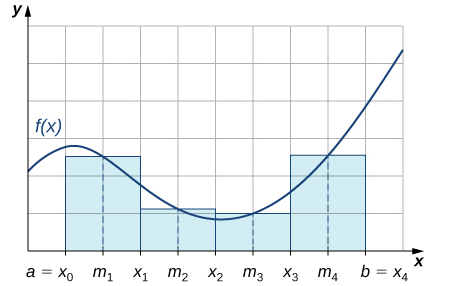

Este método es muy simple, se basa en dividir la curva en n intervalos iguales y calcular el área del rectángulo de valor $f(x)$ en el punto medio.

$\int{a}^{b} f(x) dx \approx  h\sum_{i=0}^{n-1} f(m_{i}), m_i = a+\frac{h}{2}+ih, h = (b-a)/n$


In [3]:
# La integración mediante el punto medio puede expresarse de forma vectorizada muy eficaz

def intpuntomedio(f, a, b, n=100):
    h = (b-a)/n
    x = np.linspace(a + h/2, b - h/2, n)  # Lista de puntos medios
    return h*sum(f(x))

integxsqmypm = intpuntomedio(lambda x : x**2,0,1)   # definimos la función a integrar en la llamada usando lambda
print("Integral de x^2 entre 0 y 1 según la regla del punto medio es {:.8f} ".format(integxsqmypm),"con un error absoluto ",abs((1/3)-integxsqmypm))


Integral de x^2 entre 0 y 1 según la regla del punto medio es 0.33332500  con un error absoluto  8.333333333332416e-06


## Integración por la regla de Simpson

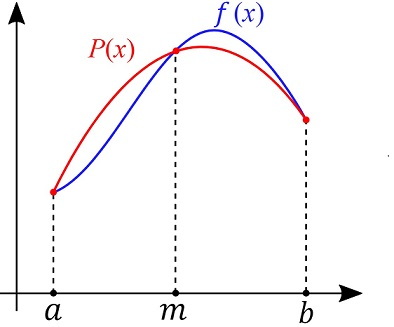

La regla de Simpson es un método de integración numérica que aproxima la función $f(x)$ mediante polinomios de segundo grado en intervalos iguales, como en la regla del trapecio.

$\int _{a}^{b}f(x)\,dx\approx {\frac {b-a}{6}}\left[f(a)+4f\left({\frac {a+b}{2}}\right)+f(b)\right]$

Consideramos el polinomio interpolador de orden dos $P_{2}(x)$, que aproxima a la función integrando $f(x)$ entre los nodos $x0 = a, x1 = b$ y $m = (a+b)/2$. La expresión de ese polinomio interpolante, expresado a través de la interpolación polinómica de Lagrange es:


$ P_{2}(x)=f(a){\frac {(x-m)(x-b)}{(a-m)(a-b)}}+f(m){\frac {(x-a)(x-b)}{(m-a)(m-b)}}+f(b){\frac {(x-a)(x-m)}{(b-a)(b-m)}}$

Y así

$I=\int _{a}^{b}f(x)\,dx$
es equivalente a
$I=\int _{a}^{b}P_{2}(x)\,dx+{\mbox{término error}}={\frac {b-a}{6}}\left[f(a)+4f(m)+f(b)\right]+E(f)$

In [4]:
def integralsimpson(f, a, b, n):
    if n % 2:
        raise ValueError("n debe ser par")

    h = (b - a) / n
    s = f(a) + f(b)

    for i in range(1, n, 2):
        s += 4 * f(a + i * h)
    for i in range(2, n-1, 2):
        s += 2 * f(a + i * h)

    return s * h / 3

integxsqmysimpson = integralsimpson(lambda x : x**2,0,1,50)   # definimos la función a integrar en la llamada usando lambda
print("Integral de x^2 entre 0 y 1 según la regla de Simpson es {:.8f} ".format(integxsqmysimpson),"con un error absoluto ",abs((1/3)-integxsqmysimpson))



Integral de x^2 entre 0 y 1 según la regla de Simpson es 0.33333333  con un error absoluto  0.0


# scipy.integrate

Este subpaquete de `SciPy` proporciona algunas __técnicas de integración tanto de funciones como de ecuaciones diferenciales__. En primer lugar importémoslo y ejecutemos la ayuda para ver cuáles son estas funciones:

In [5]:
# importamos el paquete integrate
from scipy import integrate

### trapz

Integración mediante la regla del trapecio.

In [6]:
def fsquare(x):
    return x**2

x = np.linspace(0,1,1000)
integxsqnumpy = np.trapz(fsquare(x),x)

print("Integral de x^2 entre 0 y 1 según la regla del trapecio numpy es {:.8f}".format(integxsqnumpy))


Integral de x^2 entre 0 y 1 según la regla del trapecio numpy es 0.33333350


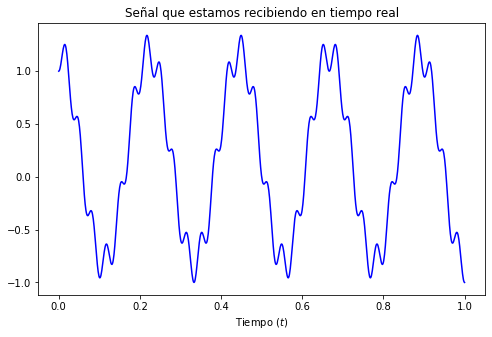

In [7]:
# Imaginemos ahora que no tenemos la expresión analítica sino solo una serie numérica, que generamos
# para el ejemplo como una suma de funciones

max_time =3
def unksignals(f1=3.0, f2=5.0):
    
    times = np.linspace(0, max_time, 1000)
    signal = np.cos(np.pi * f1 * times) + 0.35 * np.sin(2 * np.pi * f2 * times)**2
    return signal

senal = unksignals()

plt.figure(figsize=(8,5))
plt.xlabel("Tiempo ($t$)")
plt.title("Señal que estamos recibiendo en tiempo real")
plt.plot(x,senal, color="blue")


In [8]:
x = np.linspace(0,max_time,1000)
integsenal = np.trapz(senal,x)
print("Integral de la señal desconocida = ",integsenal)

Integral de la señal desconocida =  0.5250000000000001


In [9]:
x = np.linspace(0,1,1000)
integxsqnumpy = np.trapz(fsquare(x),x)

print("Integral de x^2 entre 0 y 1 según la regla del trapecio numpy es {:.8f}".format(integxsqnumpy))

Integral de x^2 entre 0 y 1 según la regla del trapecio numpy es 0.33333350


### simps

Integración mediante la regla de Simpson

In [10]:
x = np.linspace(0,1,50)
y = x**2
resultado= integrate.simps(y,x)

print("El resultado de la integral de x^2 entre 0 y 1 es {:.8f} ".format(resultado))


El resultado de la integral de x^2 entre 0 y 1 es 0.33333475 


### quad

Se basa en la librería FORTRAN 77 QUADPACK que utiliza distintos algoritmos de integración numérica por cuadratura. La cuadratura de Gauss y otros métodos derivados utilizan intervalos no uniformes, al contrario que la integración por Simpson o el trapecio. La búsqueda de intervalos óptimos se realiza mediante polinomios de Legendre y queda fuera del alcance de este curso de introducción, se verá en detalle en la asignatura de cálculo numérico.

In [11]:
# Definimos una función genérica que servirá de parámetro al integrador

def fun(x):
    return np.cos(x)

resultado, err = integrate.quad(fun, 0, np.pi/2)
# La integral de cos(x) entre 0 y pi/2 es sen(pi/2)-sen(0)
print("El resultado de la integral de cos(x) entre 0 y PI/2 es {:.8f} ".format(resultado), "con un error de: ", err)


El resultado de la integral de cos(x) entre 0 y PI/2 es 1.00000000  con un error de:  1.1102230246251564e-14


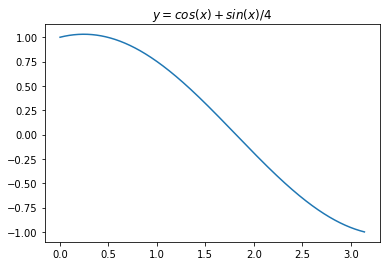

El resultado de la integral de cos(x)+sin(x)/4 entre 0 y PI es 0.50000000  con un error de:  2.281289982000215e-14


In [12]:
def sumsinusoids(x):
    return np.cos(x)+np.sin(x)/4        # La integral es sin(x)-cos(x)/4

x = np.linspace(0,np.pi,1000)
y = sumsinusoids(x)
plt.title('$y = cos(x) + sin(x)/4$')
plt.plot(x,y)
plt.show()
resultado, err = integrate.quad(sumsinusoids, 0, np.pi)

print("El resultado de la integral de cos(x)+sin(x)/4 entre 0 y PI es {:.8f} ".format(resultado), "con un error de: ", err)


## Integración mediante el Método Monte Carlo

Es un método basado en muestreo aleatorio para expresiones difíciles de evaluar con exactitud. En una dimensión es sencillo de entender. Sea $f(x)$ de la que queremos calcular la integral definida: $\theta = \int _{a}^{b}f(x)dx$. Por el teorema del valor medio existe un valor $\theta$ tal que la intengral es igual a $(b-a) \times \theta$. El método de Monte Carlo unidimensional consiste en tomar $n$ valores aletorios de $f(x)$ en el intervalo $[a,b]$ y aproximar la integral por $(b-a) \times \bar{f}$. Por el teorema del límite central el valor se aproximará al exacto cuántas más muestras se utilicen.

Ejemplo: Calcular la integral $\int _{0}^{2}x^2dx$

In [13]:
def MonteCarlounidim(fun,a,b,n=1000):
    s = np.random.uniform(0,2,n)
    val = fun(s)
    return (b-a)*np.mean(val)

for npunt in [1000,1000000]:
    inte= MonteCarlounidim(lambda x: x**2,0,2,npunt)
    print("Integral de x^2 entre 0 y por el método MonteCarlo {:.8f}. {:d} puntos, Error {:.8f}".format(inte,npunt,abs((8/3)-inte)))

Integral de x^2 entre 0 y por el método MonteCarlo 2.73514677. 1000 puntos, Error 0.06848010
Integral de x^2 entre 0 y por el método MonteCarlo 2.66792764. 1000000 puntos, Error 0.00126098


Un ejemplo en dos dimensiones, calcular el área del círculo de radio $1$. Para eso, tenemos que usar un recinto de integración que comprenda dicho círculo, por ejemplo el cuadrado de lado $2$ con origen en el centro de coordenadas. La relación entre el área total del recinto cuadrangular y el círculo será igual al cociente del número de puntos aleatorios entre los que caen dentro del círculo.

In [14]:
def dentrocirc(x,y,radio):
    if (x**2+y**2<radio**2):
        return True
    return False

def MonteCarlobidim(fun,x0,x1,y0,y1,radio=1,n=1000):
    px = np.random.uniform(x0,x1,n)
    py = np.random.uniform(y0,y1,n)
    lval = [fun(px[i],py[i],radio) for i in range(0,n)]
    return (x1-x0)*(y1-y0)*np.sum(lval)/n# (b-a)*np.mean(val)

# El área del círculo de radio 1 es PI. Este método sirve como aproximación del número

for npunt in [100,10000,10000]:
    aproxpi = MonteCarlobidim(dentrocirc,-1,1,-1,1,n=npunt)
    print("Valor de PI aproximando con {:d} puntos={:.8f} Error relativo {:.8f}".format(npunt,aproxpi,abs(np.pi-aproxpi)/np.pi))


Valor de PI aproximando con 100 puntos=3.04000000 Error relativo 0.03233795
Valor de PI aproximando con 10000 puntos=3.16200000 Error relativo 0.00649586
Valor de PI aproximando con 10000 puntos=3.12960000 Error relativo 0.00381738


El método se puede extender a $N$ dimensiones. Imaginemos que queremos calcular el valor de la integral de la función $f(x,y)=e^r$ en el recinto del círculo del ejemplo anterior, siendo $r=\sqrt{x^2+y^2}$. Lo que hay que hacer es hallar el valor medio de la función en el recinto y multiplicar por el área del recinto. Para eso, cambiamos ligeramente las funciones anteriores.

Primero hallamos la integral de forma analítica. Pde entenderse como la suma de infinitos anillos de radio $r$, anchura $dr$ y altura $e^r$, así que la integral es:

$2\pi \int_{0}^{1}re^r dr = 2\pi (re^r - e^r) \Big|_0^1 = 2\pi$

In [15]:
def expocirc(x,y,radio=1):                 
    if (x**2+y**2<radio**2):
        return np.exp(np.sqrt(x**2+y**2))
    return 0
# El área del círculo de radio 1 es PI. Este método sirve como aproximación del número

valexacto = 2*np.pi
print("Valor exacto de la integral de e^r, tal que r<1 = {:.8f} (2*PI)".format(valexacto))
for npunt in [1000,1000000]:
    aproxpi = MonteCarlobidim(expocirc,-1,1,-1,1,n=npunt)
    print("Valor aproximado de la integral de e^r, tal que r<1, con {:d} puntos={:.8f} Error {:.8f}".format(npunt,aproxpi,abs(valexacto-aproxpi)/valexacto))

Valor exacto de la integral de e^r, tal que r<1 = 6.28318531 (2*PI)
Valor aproximado de la integral de e^r, tal que r<1, con 1000 puntos=6.22760301 Error 0.00884620
Valor aproximado de la integral de e^r, tal que r<1, con 1000000 puntos=6.27898672 Error 0.00066823


Esta integral podía calcularse de forma analítica, pero no siempre es tan simlpe. Ahora vamos a calcular esa misma 
integral pero para los puntos exteriores al círculo e interiores al cuadrado. Solo tenemos que cambiar la función expocirc 
para que compute los puntos exteriores.

In [16]:
def expocircfuera(x,y,radio=1):                 
    if (x**2+y**2>radio**2):
        return np.exp(np.sqrt(x**2+y**2))
    return 0
# El área del círculo de radio 1 es PI. Este método sirve como aproximación del número

for npunt in [1000,1000000]:
    aproxpi = MonteCarlobidim(expocircfuera,-1,1,-1,1,n=npunt)
    print("Valor aproximado de la integral de e^r, tal que r>1 en el rectángulo de lado 2 y centro en (0,0), con {:d} puntos={:.8f}".format(npunt,aproxpi))

Valor aproximado de la integral de e^r, tal que r>1 en el rectángulo de lado 2 y centro en (0,0), con 1000 puntos=2.51213557
Valor aproximado de la integral de e^r, tal que r>1 en el rectángulo de lado 2 y centro en (0,0), con 1000000 puntos=2.66124381


## Integrales dobles

Con numpy también pueden calcularse integrales dobles y triples, aunque para ello el lector debe estar familiarizado con el cálculo de varias variables.

$\int_{a}^{b}\int_{g(x)}^{h(x)}f(x,y)dxdy$


In [17]:
# Caso sencillo. El recinto de integración es rectangular y los límites de y no dependen de x
# Calcular el volumen de la función f(x,y)=2 en el cuadrado (0,0),(1,1)
f = lambda x,y:2
g = lambda x:0
h = lambda x:1
volcubo, err = integrate.dblquad(f, 0, 1, g, h)
print("Volumen de la función f(x,y)=2 en el cuadrado de lado 1 = {:.8f}".format(volcubo))

# Cálculo de exp(sqrt(x^2+y^2)) en el cuadrado (-1,-1),(1,1)
f = lambda x,y:np.exp(np.sqrt(x**2+y**2))
g = lambda x:-1
h = lambda x:1
volr, err = integrate.dblquad(f, -1, 1, g, h)
print("Volumen de exp(sqrt(x^2+y^2)) en el cuadrado de lado 2 y centro en el origen = {:.8f}".format(volr))

# Cálculo de exp(sqrt(x^2+y^2)) en el círculo de  radio 1
f = lambda x,y:np.exp(np.sqrt(x**2+y**2))
g = lambda x:-np.sqrt(1-x**2)
h = lambda x:np.sqrt(1-x**2)
volcir, err = integrate.dblquad(f, -1, 1, g, h)
print("Volumen de exp(sqrt(x^2+y^2)) en el círculo de radio 1 = {:.8f}".format(volcir))
print("Volumen fuera del círculoy dentro del cuadrado = {:.8f} (Comparar con Monte Carlo)".format(volr-volcir))


Volumen de la función f(x,y)=2 en el cuadrado de lado 1 = 2.00000000
Volumen de exp(sqrt(x^2+y^2)) en el cuadrado de lado 2 y centro en el origen = 8.94186537
Volumen de exp(sqrt(x^2+y^2)) en el círculo de radio 1 = 6.28318531
Volumen fuera del círculoy dentro del cuadrado = 2.65868007 (Comparar con Monte Carlo)


---

<font size="1" color="grey">
    (c) 2020 Javier García Algarra. <a href='https://www.u-tad.com'>www.u-tad.com</a> <br>
Licensed under a Creative Commons Reconocimiento 4.0 Internacional License
</font> 